a. Translasi Citra


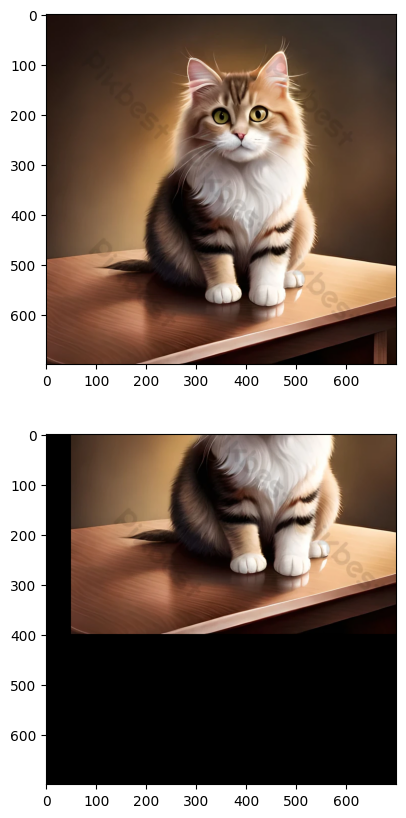

In [1]:

import imageio.v3 as img
import numpy as np
import matplotlib.pyplot as plt

def Translasi(image, shiftX, shiftY):
    imgTranslasi = np.roll(image, shift=shiftY, axis=0) # Geser vertikal
    imgTranslasi = np.roll(imgTranslasi, shift=shiftX, axis=1) # Geser horizontal
    # Mengisi bagian yang kosong dengan warna hitam (0)
    if shiftY > 0:
        imgTranslasi[:shiftY, :] = 0 # Bagian atas jika geser ke bawah
    elif shiftY < 0:
        imgTranslasi[shiftY:, :] = 0 # Bagian bawah jika geser ke atas
    if shiftX > 0:
        imgTranslasi[:, :shiftX] = 0 # Bagian kiri jika geser ke kanan
    elif shiftX < 0:
        imgTranslasi[:, shiftX:] = 0 # Bagian kanan jika geser ke kiri
    return imgTranslasi

image = img.imread("//content//Kucing Lucu.jpg")
imgResult = Translasi(image, shiftX=50, shiftY=-300)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.imshow(image)
plt.subplot(2,1,2)
plt.imshow(imgResult)
plt.show()

b. Mirroring

<ipython-input-2-8921da4f651f>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = img.imread(path)


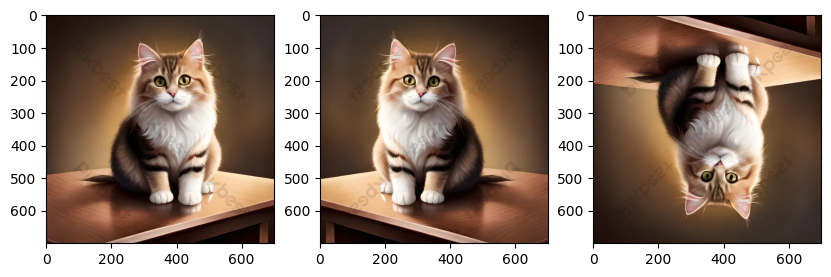

In [2]:
import numpy as np
import imageio as img
import matplotlib.pyplot as plt
path = '//content//Kucing Lucu.jpg'
image = img.imread(path)
height, width = image.shape[:2]
horizontal = np.zeros_like(image)
vertical = np.zeros_like(image)
for y in range(height):
  for x in range(width):
    horizontal[y, x] = image[y, width - 1 - x]
for y in range(height):
  for x in range(width):
    vertical[y, x] = image[height - 1 - y, x]
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.subplot(1, 3, 2)
plt.imshow(horizontal)
plt.subplot(1, 3, 3)
plt.imshow(vertical)
plt.show()

c. Rotasi Citra

<ipython-input-3-7139fa7ea6e9>:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = img.imread('//content//Kucing Lucu.jpg')


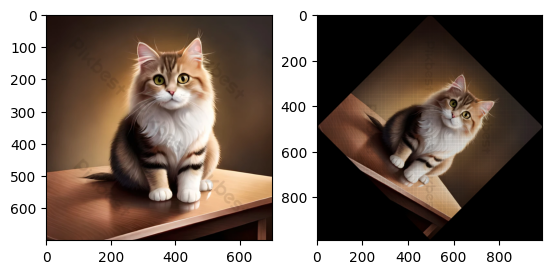

In [3]:

import imageio as img
import numpy as np
import matplotlib.pyplot as plt

def rotateImage(image, degree):
  radian_deg = np.radians(degree)
  cos_deg, sin_deg = np.cos(radian_deg), np.sin(radian_deg)
  height, width = image.shape[:2]
  max_dim = int(np.sqrt(height**2 + width**2))
  outputImage = np.zeros((max_dim, max_dim, 3), dtype=image.dtype)
  centerY, centerX = max_dim//2, max_dim//2
  for y in range(-height//2, height//2):
    for x in range(-width//2, width//2):
      newX = int(cos_deg * x - sin_deg * y) + centerX
      newY = int(sin_deg * x + cos_deg * y) + centerY
      if 0 <= newX < max_dim and 0 <= newY < max_dim:
        outputImage[newY, newX] = image[y + height//2, x + width//2]
  return outputImage

image = img.imread('//content//Kucing Lucu.jpg')
rotated_image = rotateImage(image, 45)

plt.subplot(1, 2, 1)
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.imshow(rotated_image)

plt.show()

d. Zooming

<ipython-input-8-80d3075387bb>:19: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = img.imread('//content//Kucing Lucu.jpg')


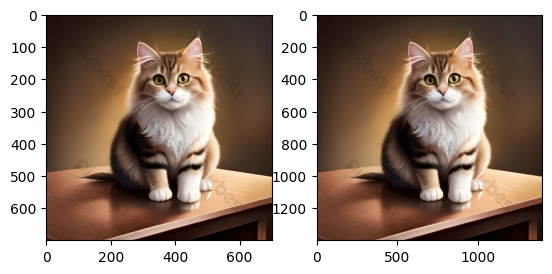

In [8]:

import numpy as np
import imageio as img
import matplotlib.pyplot as plt

def zoomPlus(image, factor):
  height, width = image.shape[:2]
  new_height = int(height * factor)
  new_width = int(width * factor)
  imgZoom = np.zeros((new_height, new_width, 3), dtype=image.dtype)
  for y in range(new_height):
    for x in range(new_width):
      ori_y = int(y / factor)
      ori_x = int(x / factor)
      ori_y = min(ori_y, height - 1)
      ori_x = min(ori_x, width - 1)
      imgZoom[y, x] = image[ori_y, ori_x]
  return imgZoom

image = img.imread('//content//Kucing Lucu.jpg')
skala = 2.0

imgZoom = zoomPlus(image, skala)
img.imwrite("D:\\z.jpg", imgZoom)
plt.subplot(1, 2, 1)
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.imshow(imgZoom)
plt.show()

2. Miroring bersamaan

<ipython-input-9-bcf38924b011>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = img.imread(path)


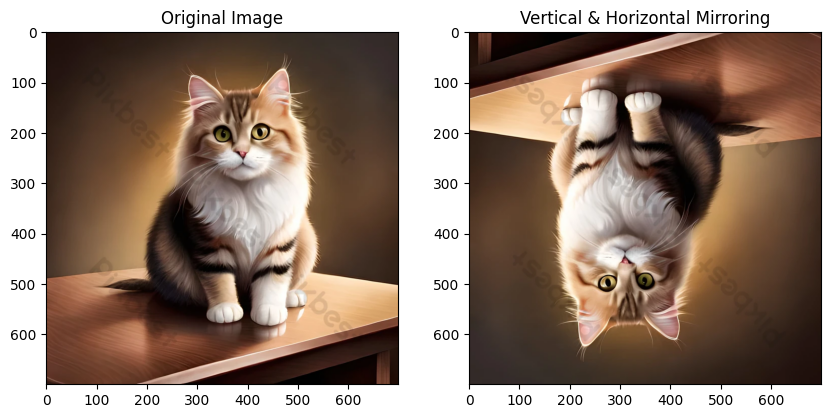

In [9]:
import numpy as np
import imageio as img
import matplotlib.pyplot as plt

# Path gambar
path = "//content//Kucing Lucu.jpg"
image = img.imread(path)

# Dapatkan dimensi gambar
height, width = image.shape[:2]

# Buat salinan kosong untuk mirroring vertikal dan horizontal
mirror_both = np.zeros_like(image)

# Proses mirroring vertikal dan horizontal bersamaan
for y in range(height):
    for x in range(width):
        mirror_both[y, x] = image[height - 1 - y, width - 1 - x]

# Visualisasi gambar asli dan hasil mirroring
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title("Vertical & Horizontal Mirroring")
plt.imshow(mirror_both)
plt.show()


Rotasi Citra pivot

<ipython-input-10-3b681eef5fa2>:30: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = img.imread("/content/Kucing Lucu.jpg")


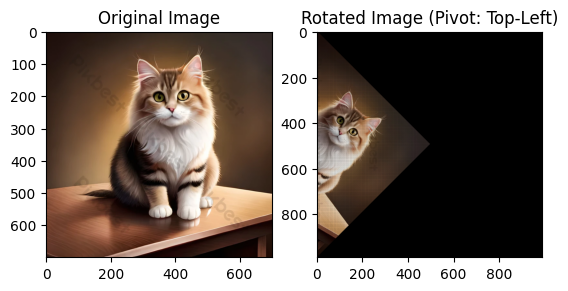

In [10]:
import imageio as img
import numpy as np
import matplotlib.pyplot as plt

def rotateImage(image, degree):
    radian_deg = np.radians(degree)
    cos_deg, sin_deg = np.cos(radian_deg), np.sin(radian_deg)
    height, width = image.shape[:2]

    # Hitung dimensi gambar output berdasarkan rotasi
    max_dim_x = int(abs(width * cos_deg) + abs(height * sin_deg))
    max_dim_y = int(abs(width * sin_deg) + abs(height * cos_deg))

    # Buat gambar output dengan ukuran yang baru
    outputImage = np.zeros((max_dim_y, max_dim_x, 3), dtype=image.dtype)

    for y in range(height):
        for x in range(width):
            # Tentukan posisi baru untuk setiap piksel menggunakan titik (0,0) sebagai pivot
            newX = int(cos_deg * x - sin_deg * y)
            newY = int(sin_deg * x + cos_deg * y)

            # Pastikan koordinat baru ada dalam batas dimensi gambar output
            if 0 <= newX < max_dim_x and 0 <= newY < max_dim_y:
                outputImage[newY, newX] = image[y, x]

    return outputImage

# Baca gambar
image = img.imread("/content/Kucing Lucu.jpg")

# Rotasi gambar
rotated_image = rotateImage(image, 45)

# Visualisasi gambar asli dan hasil rotasi
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Rotated Image (Pivot: Top-Left)")
plt.imshow(rotated_image)

plt.show()


ZoomMinus

<ipython-input-11-2d992b0e9721>:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = img.imread("//content//Kucing Lucu.jpg")


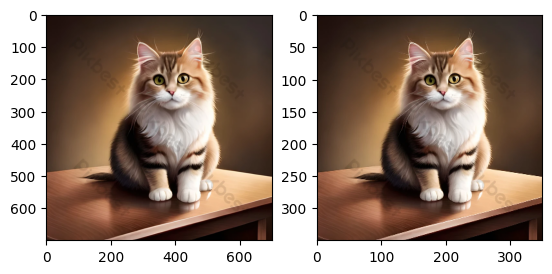

In [11]:
import numpy as np
import imageio as img
import matplotlib.pyplot as plt

def zoomPlus(image, factor):
  height, width = image.shape[:2]
  new_height = int(height / factor)
  new_width = int(width / factor)
  imgZoom = np.zeros((new_height, new_width, 3), dtype=image.dtype)
  for y in range(new_height):
    for x in range(new_width):
      ori_y = int(y * factor)
      ori_x = int(x * factor)

      ori_y = min(ori_y, height - 1)
      ori_x = min(ori_x, width - 1)

      imgZoom[y, x] = image[ori_y, ori_x]
  return imgZoom

image = img.imread("//content//Kucing Lucu.jpg")
skala = 2.0

imgZoom = zoomPlus(image, skala)
img.imwrite("C:\\Users\\lenovo\\Downloads\\PCD-NO 2.jpg", imgZoom)
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(imgZoom)
plt.show()